In [1]:
import numpy as np
import matplotlib.pyplot as plt
from helpers.plotting import *
from helpers.process_data import *
from semivisible_jet.utils import *
import os

In [2]:
def load_samples(file):
    samples = np.loadtxt(file, dtype=str)
    # Get the names of all varibles
    variables = samples[0]
    # Get the events ordered by varibles
    events = np.asarray(samples[1:], dtype = float)
    return variables, events
def name_map():
    return {
        "m_jj": "$m_{{\\rm jj}}$",
        "met": "MET",
        "ht": "$H_{{\\rm T}}$",
        "pT_j1": "Leading jet $p_{{\\rm T}}$",
        "pT_j2": "Sub-leading jet $p_{{\\rm T}}$",
        "tau21_j1": "Leading jet $\\tau_2/\\tau_1$",
        "tau21_j2": "Sub-leading jet $\\tau_2/\\tau_1$",
        "tau32_j1": "Leading jet $\\tau_3/\\tau_2$",
        "tau32_j2": "Sub-leading jet $\\tau_3/\\tau_2$",
        "min_dPhi": "min$\\Delta\\phi(\\rm j_i, \\rm MET)$",
    }

def unit_map():
    return {
        "m_jj": "(GeV)",
        "met": "(GeV)",
        "ht": "(GeV)",
        "pT_j1": "(GeV)",
        "pT_j2": "(GeV)",
        "tau21_j1": "",
        "tau21_j2": "",
        "tau32_j1": "",
        "tau32_j2": "",
        "min_dPhi": "",
    }
def ind(variables, name):
    return np.where(variables == name)[0][0]

Paper len signals: v1: 7895, v2:548, v3:71657, v4:771, v5:70478, v6:65075, v7:3393
My signals 173798
Done loading!
465930
504751
70478


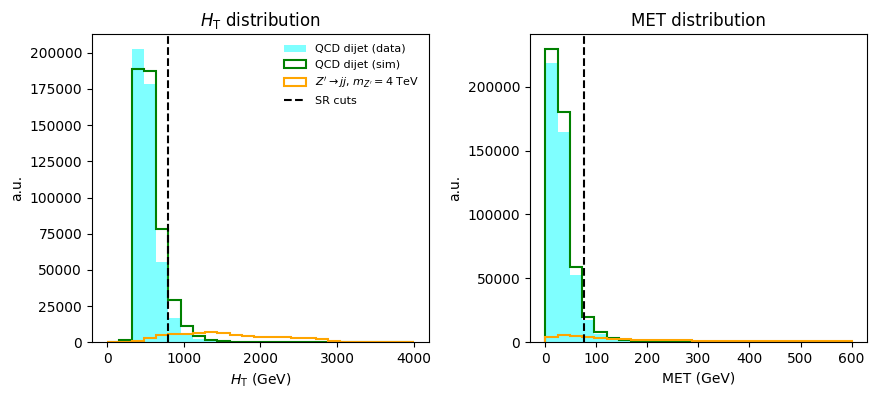

In [4]:

variables, sig = load_samples("../sig_samples/rinv13_3TeV_300GeV.txt")
# variables, sig = load_samples("../testing_samples/signal_1mil_ZD.txt")


#checking signals from paper ang mine
v1, sig1 = load_samples("../sig_samples/rinv0_pTmin200GeV.txt")
v2, sig2 = load_samples("../sig_samples/rinv13_2TeV_100GeV.txt")
v3, sig3 = load_samples("../sig_samples/rinv13_2TeV_200GeV.txt")
v4, sig4 = load_samples("../sig_samples/rinv13_2TeV_300GeV.txt")
v5, sig5 = load_samples("../sig_samples/rinv13_3TeV_300GeV.txt")
v6, sig6 = load_samples("../sig_samples/rinv13_pTmin200GeV.txt")
v7, sig7 = load_samples("../sig_samples/rinv23_pTmin200GeV.txt")

vmine, sig8 = load_samples("../testing_samples/signal_1mil_ZD.txt")
print("Paper len signals:", f"v1: {len(sig1)}, v2:{len(sig2)}, v3:{len(sig3)}, v4:{len(sig4)}, v5:{len(sig5)}, v6:{len(sig6)}, v7:{len(sig7)}")
print("My signals", len(sig8))

data_dir = "../qcd_data_samples/"
mc_dir = "../qcd_mc_samples/"

var_names = ["ht", "met", "m_jj", "tau21_j1", "tau21_j2", "tau32_j1", "tau32_j2"]

data_events_list = []
mc_events_list = []
for i in range(1):
        # Load input events ordered by varibles
        file_path_data = f"{data_dir}/qcd_{i}.txt"
        file_path_mc = f"{mc_dir}/qcd_{i}.txt"
        if os.path.isfile(file_path_data) and os.path.isfile(file_path_mc):
            _, bkg_i = load_samples(file_path_data)
            bkg_i = get_quality_events(bkg_i)
            data_events_list.append(bkg_i)
            _, mc_i = load_samples(file_path_mc)
            mc_i = get_quality_events(mc_i)
            mc_events_list.append(mc_i)
#     print(len(bkg_events_list[0]))        
print("Done loading!")


data_bg = np.concatenate(data_events_list)
mc_bg = np.concatenate(mc_events_list)

print(len(data_bg))
print(len(mc_bg))
print(len(sig))

labels_list = [r"$Z' \to jj$, $m_{Z'} = 4$ TeV", "QCD dijet (data)", "QCD dijet (sim)"]
    

names = name_map()
units = unit_map()

fig, axs = plt.subplots(1, 2, figsize=(10, 4)) 
plt.subplots_adjust(wspace=0.3)  

for i, x in enumerate(['ht', 'met']):
    ind_x = ind(variables, x)
    sig_x = sig[:, ind_x]
    bkg_x = data_bg[:, ind_x]
    mc_x = mc_bg[:, ind_x]

    title = f"{names[x]} distribution"
    xlabel = f"{names[x]} {units[x]}"

    # Define bins
    if x == 'ht':
        bins = np.linspace(0, 4000, 26)
    elif x == 'met':
        bins = np.linspace(0, 600, 26)

    # Plot data
    axs[i].hist(bkg_x, bins=bins, label=labels_list[1], histtype='stepfilled', color='cyan', alpha=0.5)
    axs[i].hist(mc_x, bins=bins, label=labels_list[2], histtype='step', color='green', linewidth=1.5)
    axs[i].hist(sig_x, bins=bins, label=labels_list[0], histtype='step', color='orange', linewidth=1.5)

    axs[i].set_title(title, fontsize=12)
    axs[i].set_xlabel(xlabel, fontsize=10)
    axs[i].set_ylabel("a.u.", fontsize=10)

    # Add SR cut lines (adjust for each plot accordingly)
    if x == 'ht':
        axs[i].axvline(x=800, color='black', linestyle='--', label="SR cuts")
    elif x == 'met':
        axs[i].axvline(x=75, color='black', linestyle='--')

# Add legend to one of the plots and position it outside
axs[0].legend(loc='upper right', fontsize=8, frameon=False)

plt.show()

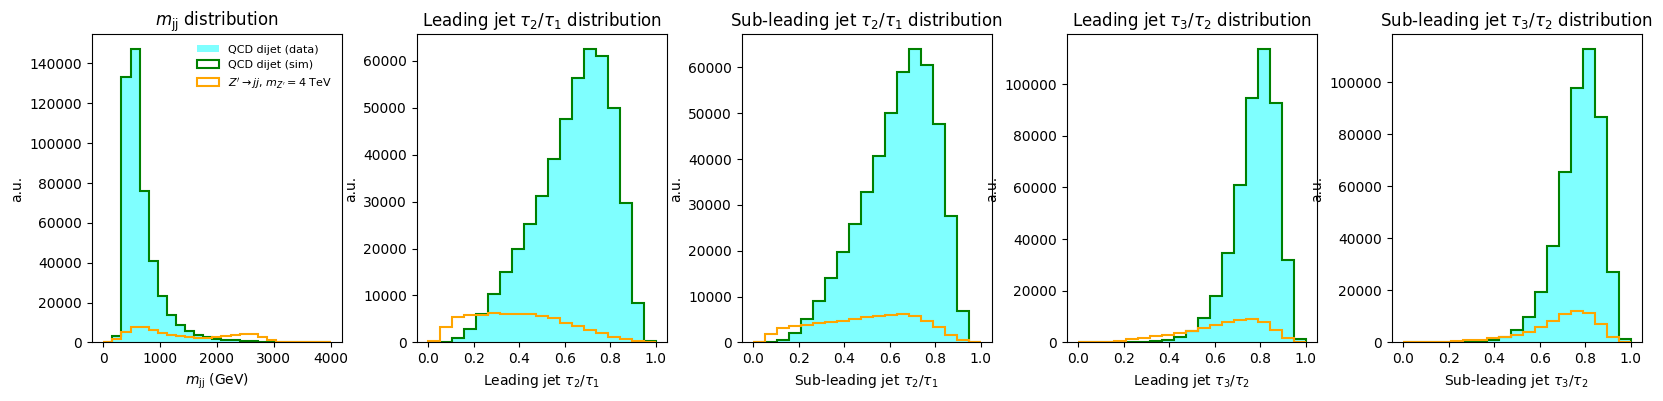

In [5]:
fig, axs = plt.subplots(1, 5, figsize=(20, 4))  # Adjust the number of columns for more subplots
plt.subplots_adjust(wspace=0.3)  # Adjust spacing between plots

# List of variables to plot
variables_to_plot = ['m_jj', 'tau21_j1', 'tau21_j2', 'tau32_j1', 'tau32_j2']

# Loop over the variables and create a plot for each
for i, x in enumerate(variables_to_plot):
    if x not in variables:
        print(f"Warning: {x} not found in variables, skipping.")
        continue  # Skip if the variable isn't found

    ind_x = ind(variables, x)
    sig_x = sig[:, ind_x]
    bkg_x = data_bg[:, ind_x]
    mc_x = mc_bg[:, ind_x]

    title = f"{names[x]} distribution"
    xlabel = f"{names[x]} {units[x]}"

    # Define bins for each variable
    if "tau" in x:
        bins = np.linspace(0, 1, 20)
    elif x == "m_jj":
        bins = np.linspace(0, 4000, 26)

    # Plot data
    axs[i].hist(bkg_x, bins=bins, label=labels_list[1], histtype='stepfilled', color='cyan', alpha=0.5)
    axs[i].hist(mc_x, bins=bins, label=labels_list[2], histtype='step', color='green', linewidth=1.5)
    axs[i].hist(sig_x, bins=bins, label=labels_list[0], histtype='step', color='orange', linewidth=1.5)

    axs[i].set_title(title, fontsize=12)
    axs[i].set_xlabel(xlabel, fontsize=10)
    axs[i].set_ylabel("a.u.", fontsize=10)

# Add legend to one of the plots and position it outside
axs[0].legend(loc='upper right', fontsize=8, frameon=False)

plt.show()

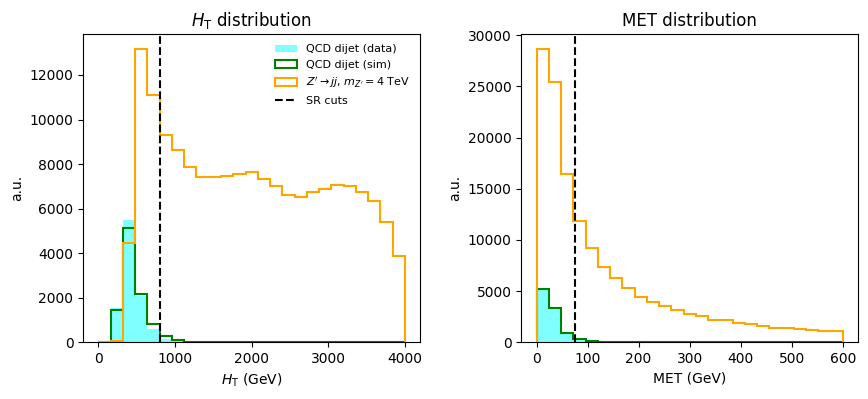

In [5]:
#Test stuff
_, data_bg = load_samples("testing_data/data_bg.txt")
_, mc_bg = load_samples("testing_data/mc_bg.txt")

labels_list = [r"$Z' \to jj$, $m_{Z'} = 4$ TeV", "QCD dijet (data)", "QCD dijet (sim)"]
    

names = name_map()
units = unit_map()

fig, axs = plt.subplots(1, 2, figsize=(10, 4)) 
plt.subplots_adjust(wspace=0.3)  

for i, x in enumerate(['ht', 'met']):
    ind_x = ind(variables, x)
    sig_x = sig[:, ind_x]
    bkg_x = data_bg[:, ind_x]
    mc_x = mc_bg[:, ind_x]

    title = f"{names[x]} distribution"
    xlabel = f"{names[x]} {units[x]}"

    # Define bins
    if x == 'ht':
        bins = np.linspace(0, 4000, 26)
    elif x == 'met':
        bins = np.linspace(0, 600, 26)

    # Plot data
    axs[i].hist(bkg_x, bins=bins, label=labels_list[1], histtype='stepfilled', color='cyan', alpha=0.5)
    axs[i].hist(mc_x, bins=bins, label=labels_list[2], histtype='step', color='green', linewidth=1.5)
    axs[i].hist(sig_x, bins=bins, label=labels_list[0], histtype='step', color='orange', linewidth=1.5)

    axs[i].set_title(title, fontsize=12)
    axs[i].set_xlabel(xlabel, fontsize=10)
    axs[i].set_ylabel("a.u.", fontsize=10)

    # Add SR cut lines (adjust for each plot accordingly)
    if x == 'ht':
        axs[i].axvline(x=800, color='black', linestyle='--', label="SR cuts")
    elif x == 'met':
        axs[i].axvline(x=75, color='black', linestyle='--')

# Add legend to one of the plots and position it outside
axs[0].legend(loc='upper right', fontsize=8, frameon=False)

plt.show()

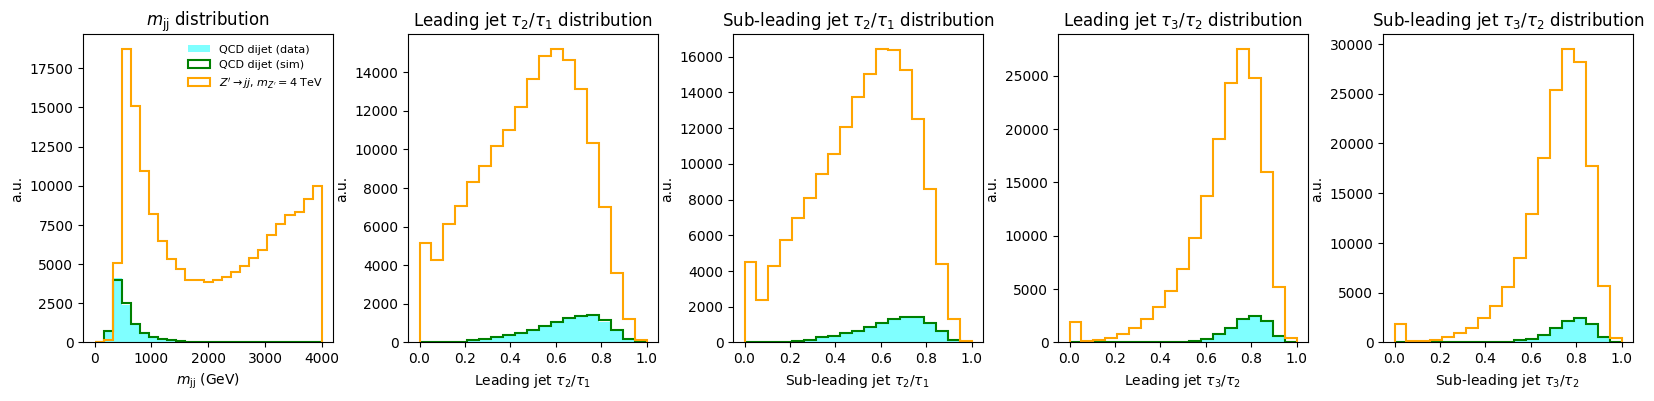

In [6]:
fig, axs = plt.subplots(1, 5, figsize=(20, 4))  # Adjust the number of columns for more subplots
plt.subplots_adjust(wspace=0.3)  # Adjust spacing between plots

# List of variables to plot
variables_to_plot = ['m_jj', 'tau21_j1', 'tau21_j2', 'tau32_j1', 'tau32_j2']

# Loop over the variables and create a plot for each
for i, x in enumerate(variables_to_plot):
    if x not in variables:
        print(f"Warning: {x} not found in variables, skipping.")
        continue  # Skip if the variable isn't found

    ind_x = ind(variables, x)
    sig_x = sig[:, ind_x]
    bkg_x = data_bg[:, ind_x]
    mc_x = mc_bg[:, ind_x]

    title = f"{names[x]} distribution"
    xlabel = f"{names[x]} {units[x]}"

    # Define bins for each variable
    if "tau" in x:
        bins = np.linspace(0, 1, 20)
    elif x == "m_jj":
        bins = np.linspace(0, 4000, 26)

    # Plot data
    axs[i].hist(bkg_x, bins=bins, label=labels_list[1], histtype='stepfilled', color='cyan', alpha=0.5)
    axs[i].hist(mc_x, bins=bins, label=labels_list[2], histtype='step', color='green', linewidth=1.5)
    axs[i].hist(sig_x, bins=bins, label=labels_list[0], histtype='step', color='orange', linewidth=1.5)

    axs[i].set_title(title, fontsize=12)
    axs[i].set_xlabel(xlabel, fontsize=10)
    axs[i].set_ylabel("a.u.", fontsize=10)

# Add legend to one of the plots and position it outside
axs[0].legend(loc='upper right', fontsize=8, frameon=False)

plt.show()

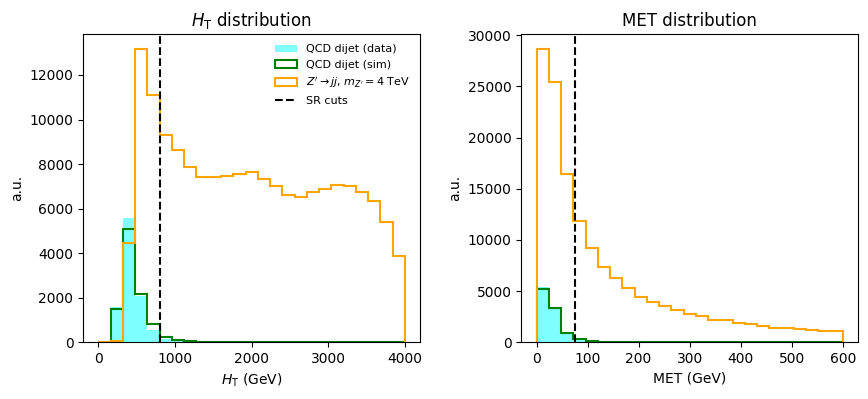

In [7]:
#Test stuff
_, data_bg = load_samples("testing_data/data_test.txt")
_, mc_bg = load_samples("testing_data/mc_test.txt")

labels_list = [r"$Z' \to jj$, $m_{Z'} = 4$ TeV", "QCD dijet (data)", "QCD dijet (sim)"]
    

names = name_map()
units = unit_map()

fig, axs = plt.subplots(1, 2, figsize=(10, 4)) 
plt.subplots_adjust(wspace=0.3)  

for i, x in enumerate(['ht', 'met']):
    ind_x = ind(variables, x)
    sig_x = sig[:, ind_x]
    bkg_x = data_bg[:, ind_x]
    mc_x = mc_bg[:, ind_x]

    title = f"{names[x]} distribution"
    xlabel = f"{names[x]} {units[x]}"

    # Define bins
    if x == 'ht':
        bins = np.linspace(0, 4000, 26)
    elif x == 'met':
        bins = np.linspace(0, 600, 26)

    # Plot data
    axs[i].hist(bkg_x, bins=bins, label=labels_list[1], histtype='stepfilled', color='cyan', alpha=0.5)
    axs[i].hist(mc_x, bins=bins, label=labels_list[2], histtype='step', color='green', linewidth=1.5)
    axs[i].hist(sig_x, bins=bins, label=labels_list[0], histtype='step', color='orange', linewidth=1.5)

    axs[i].set_title(title, fontsize=12)
    axs[i].set_xlabel(xlabel, fontsize=10)
    axs[i].set_ylabel("a.u.", fontsize=10)

    # Add SR cut lines (adjust for each plot accordingly)
    if x == 'ht':
        axs[i].axvline(x=800, color='black', linestyle='--', label="SR cuts")
    elif x == 'met':
        axs[i].axvline(x=75, color='black', linestyle='--')

# Add legend to one of the plots and position it outside
axs[0].legend(loc='upper right', fontsize=8, frameon=False)

plt.show()

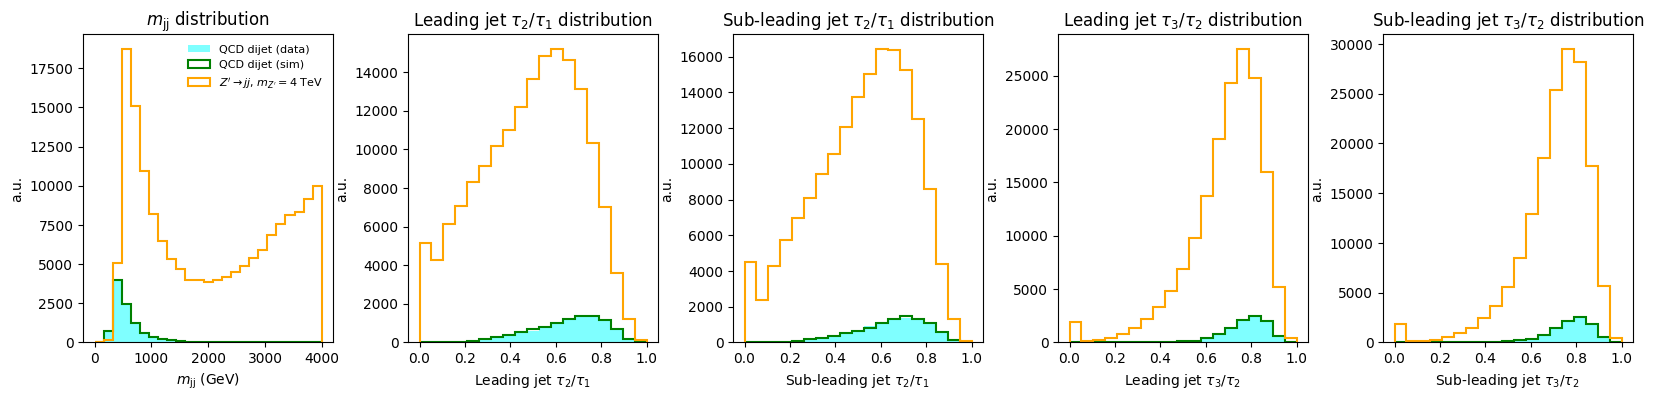

In [8]:
fig, axs = plt.subplots(1, 5, figsize=(20, 4))  # Adjust the number of columns for more subplots
plt.subplots_adjust(wspace=0.3)  # Adjust spacing between plots

# List of variables to plot
variables_to_plot = ['m_jj', 'tau21_j1', 'tau21_j2', 'tau32_j1', 'tau32_j2']

# Loop over the variables and create a plot for each
for i, x in enumerate(variables_to_plot):
    if x not in variables:
        print(f"Warning: {x} not found in variables, skipping.")
        continue  # Skip if the variable isn't found

    ind_x = ind(variables, x)
    sig_x = sig[:, ind_x]
    bkg_x = data_bg[:, ind_x]
    mc_x = mc_bg[:, ind_x]

    title = f"{names[x]} distribution"
    xlabel = f"{names[x]} {units[x]}"

    # Define bins for each variable
    if "tau" in x:
        bins = np.linspace(0, 1, 20)
    elif x == "m_jj":
        bins = np.linspace(0, 4000, 26)

    # Plot data
    axs[i].hist(bkg_x, bins=bins, label=labels_list[1], histtype='stepfilled', color='cyan', alpha=0.5)
    axs[i].hist(mc_x, bins=bins, label=labels_list[2], histtype='step', color='green', linewidth=1.5)
    axs[i].hist(sig_x, bins=bins, label=labels_list[0], histtype='step', color='orange', linewidth=1.5)

    axs[i].set_title(title, fontsize=12)
    axs[i].set_xlabel(xlabel, fontsize=10)
    axs[i].set_ylabel("a.u.", fontsize=10)

# Add legend to one of the plots and position it outside
axs[0].legend(loc='upper right', fontsize=8, frameon=False)

plt.show()